In [41]:
import sys,os
sys.path.append("../")
sys.path.append("../../../generate_apodized_mask/")
import py_qu2eb
import pymain
import healpy as h
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [42]:
apomask=h.read_map("../datain/mask_gal70_nside512.fits",verbose=False)
mask[mask>0.99]=1. ; mask[mask<=0.99]=0.
nside=h.get_nside(mask) ; npixtot=h.nside2npix(nside)

In [43]:
# cl=np.zeros(2048,float)
# cl[1]=1.
# apomask=h.synfast(cl,512)

In [44]:
apomask=pymain.gen_apodized_mask(mask,nside,1,0.,0.,780.,npixtot)
apomask1=pymain.gen_apodized_mask(mask,nside,1,0.,0.,360.,npixtot)
apomask1[apomask1<0.9999]=0. ; apomask1[apomask1>=0.9999]=1.

<IPython.core.display.Javascript object>


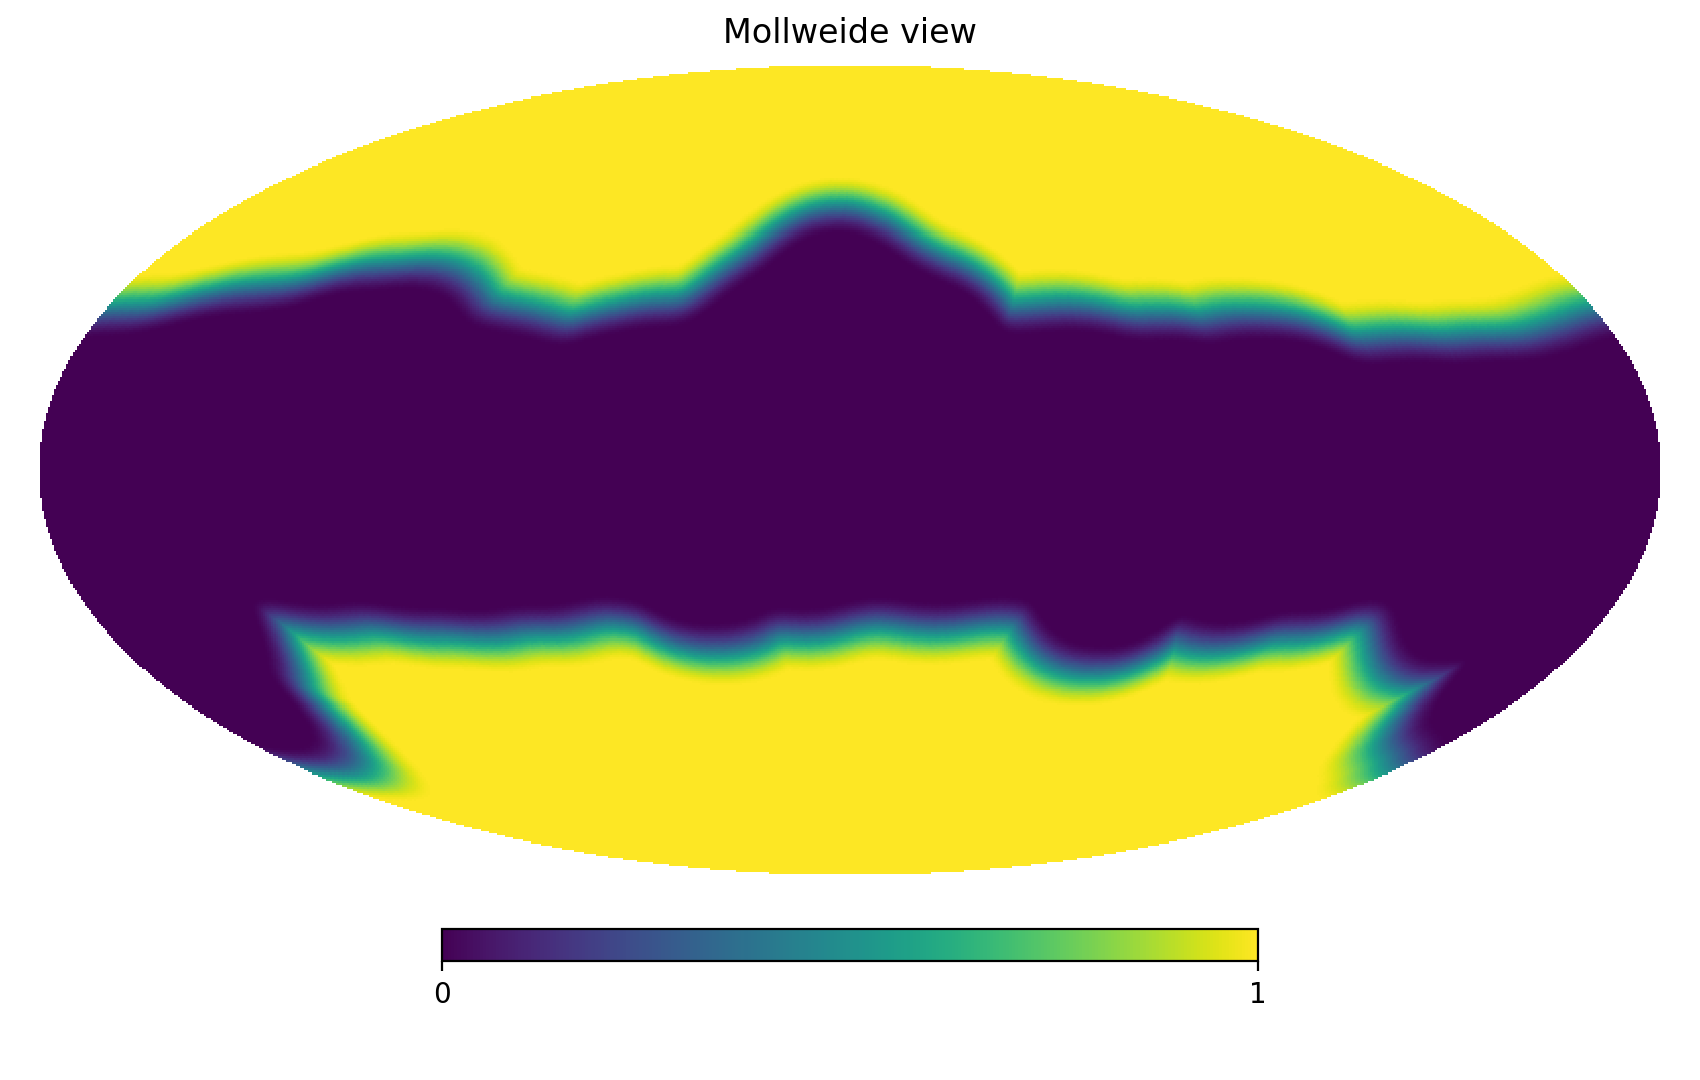

In [45]:
h.mollview(apomask)

In [17]:
TQU=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TQU=transpose(TQU)

In [24]:
TEB=py_qu2eb.get_teb(TQU,apomask,nside,3*nside,1,4,npixtot)
TEB=transpose(TEB)

In [27]:
ell=arange(1025)
fl=sqrt(((ell+2.)*(ell-1.))*ell*(ell+1.))
m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB0_alm=h.map2alm(m,lmax=1024,pol=True)
for i in range(3):
    h.almxfl(TEB0_alm[i,],fl,inplace=True)
TEB0=h.alm2map(TEB0_alm,512,pol=False,verbose=False)
TEB0_alm=h.map2alm(TEB0*apomask**3.,lmax=1024,pol=False)
clb0=h.alm2cl(TEB0_alm[2])

m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB1_alm=h.map2alm(m*apomask,lmax=1024,pol=True)
for i in range(3):
    h.almxfl(TEB1_alm[i,],fl,inplace=True)
# TEB1=h.alm2map(TEB1_alm,512,pol=False,verbose=False)
clb1=h.alm2cl(TEB1_alm[2])

TEB_alm=h.map2alm(TEB*apomask,lmax=1024,pol=True)
clb=h.alm2cl(TEB_alm[2])


In [28]:
cle0=h.alm2cl(TEB0_alm[1])

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


<IPython.core.display.Javascript object>


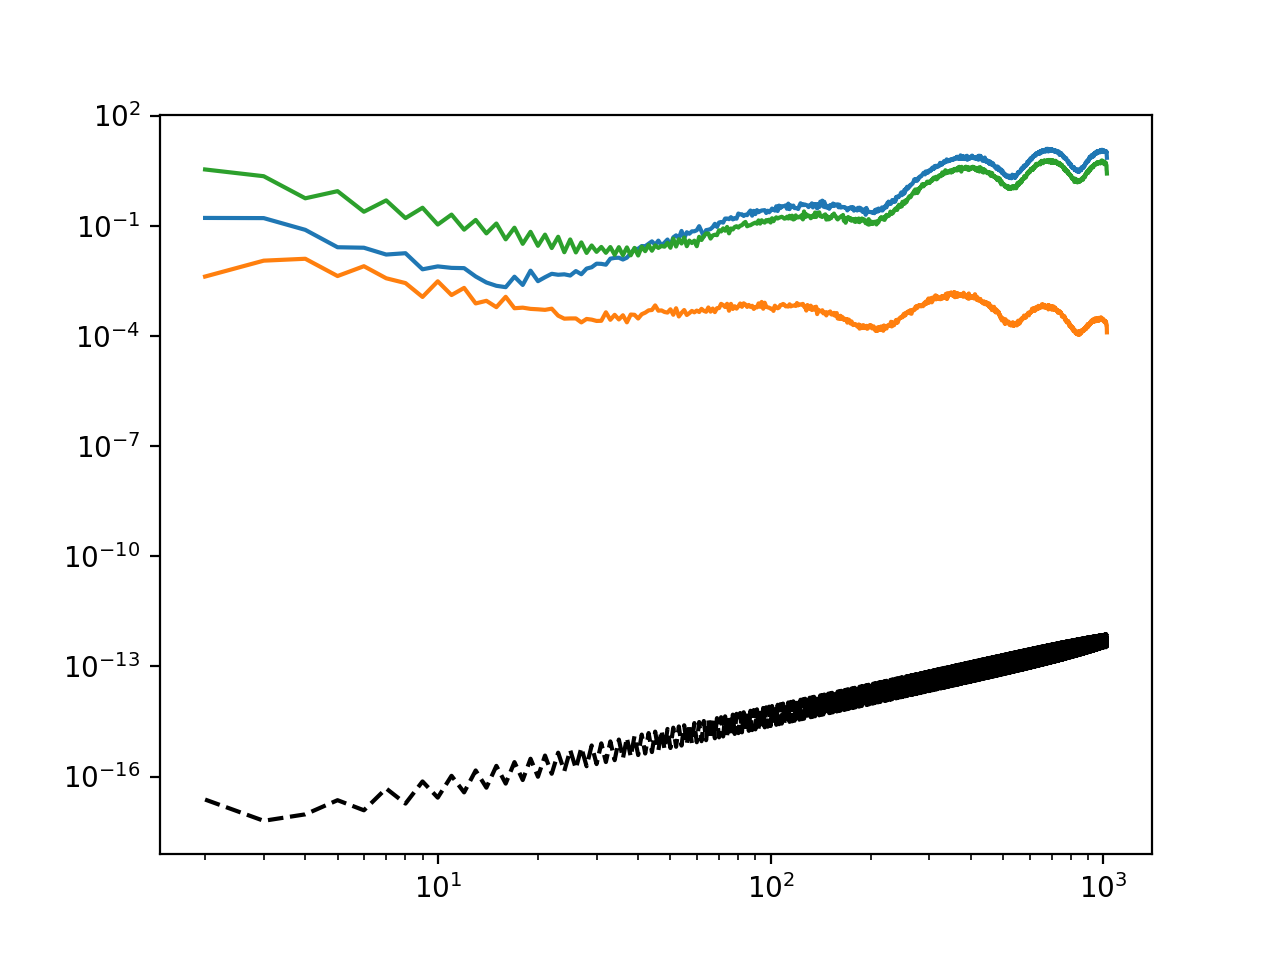

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


[]

In [29]:
ell=arange(1025)
f=1./((2.*pi)*((ell+2.)*(ell-1.)))
figure()
plot(ell,f*cle0)
plot(ell,f*clb0,"k--")
plot(ell,f*clb1)
plot(ell,f*clb)
loglog()

<IPython.core.display.Javascript object>


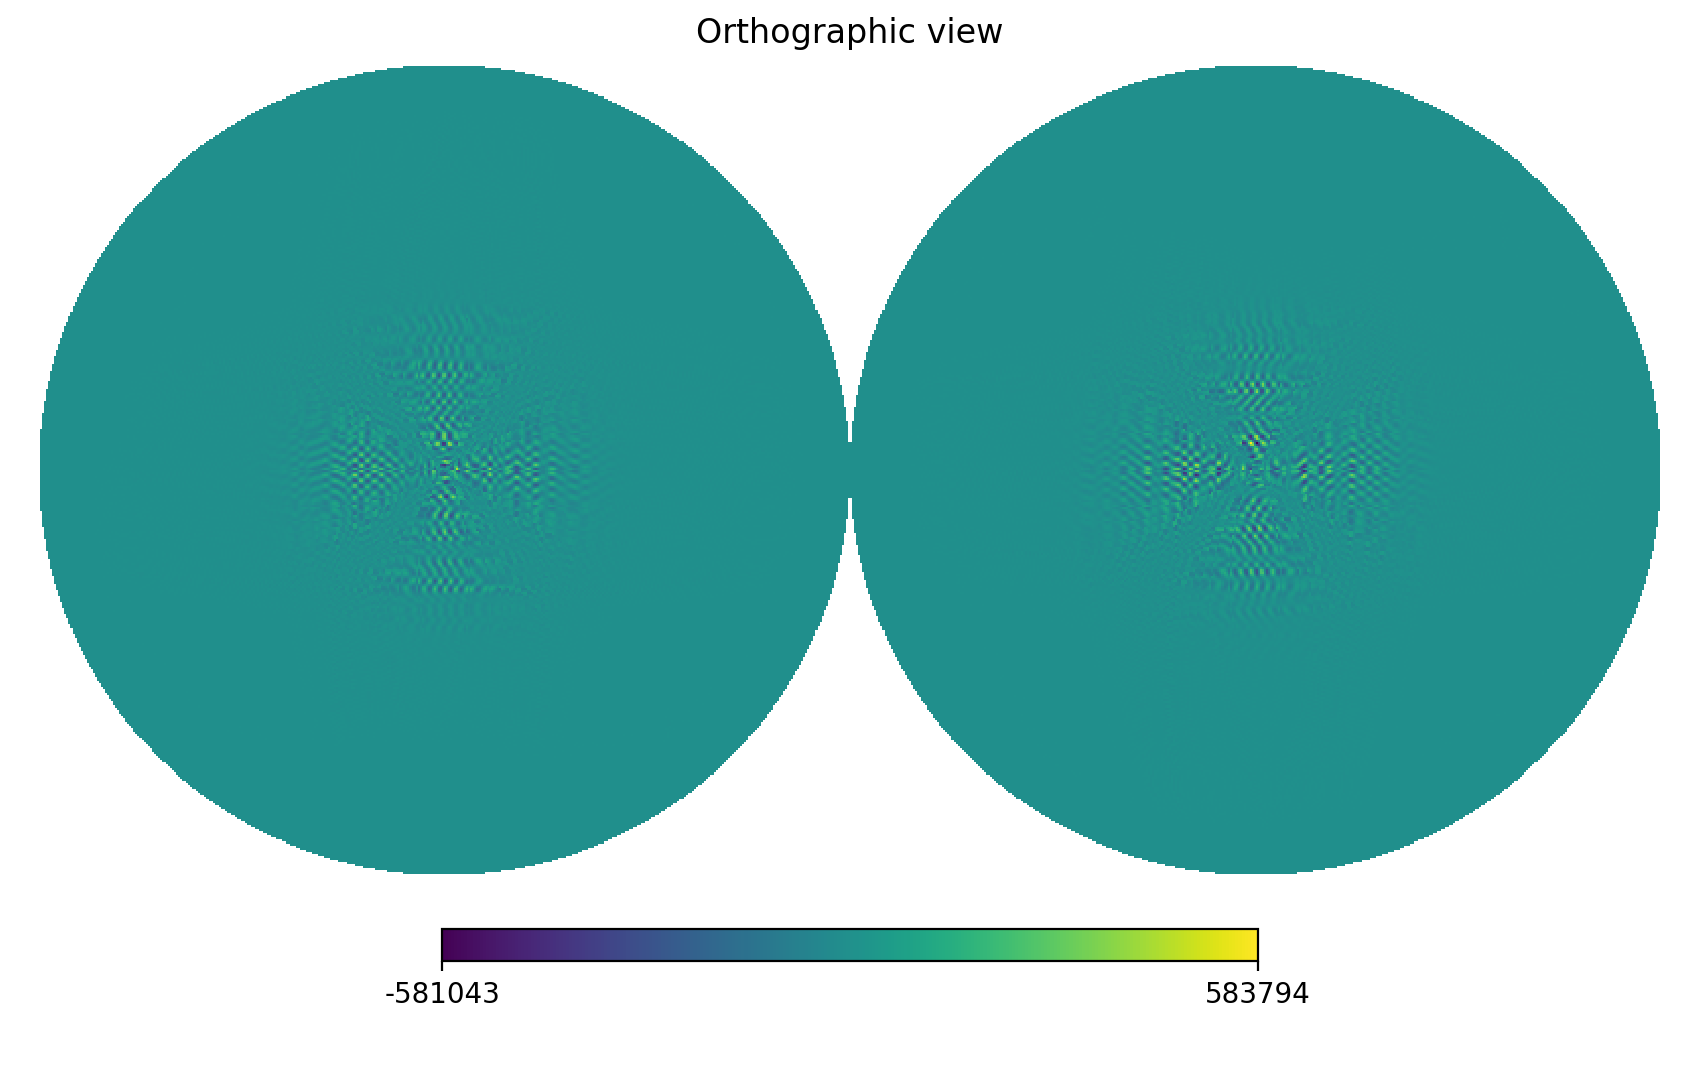

In [32]:
h.orthview(TEB[2,],rot=(0,90))

In [35]:
TEBf=h.read_map("../dataout/map_TEB.fits",(0,1,2))

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


<IPython.core.display.Javascript object>


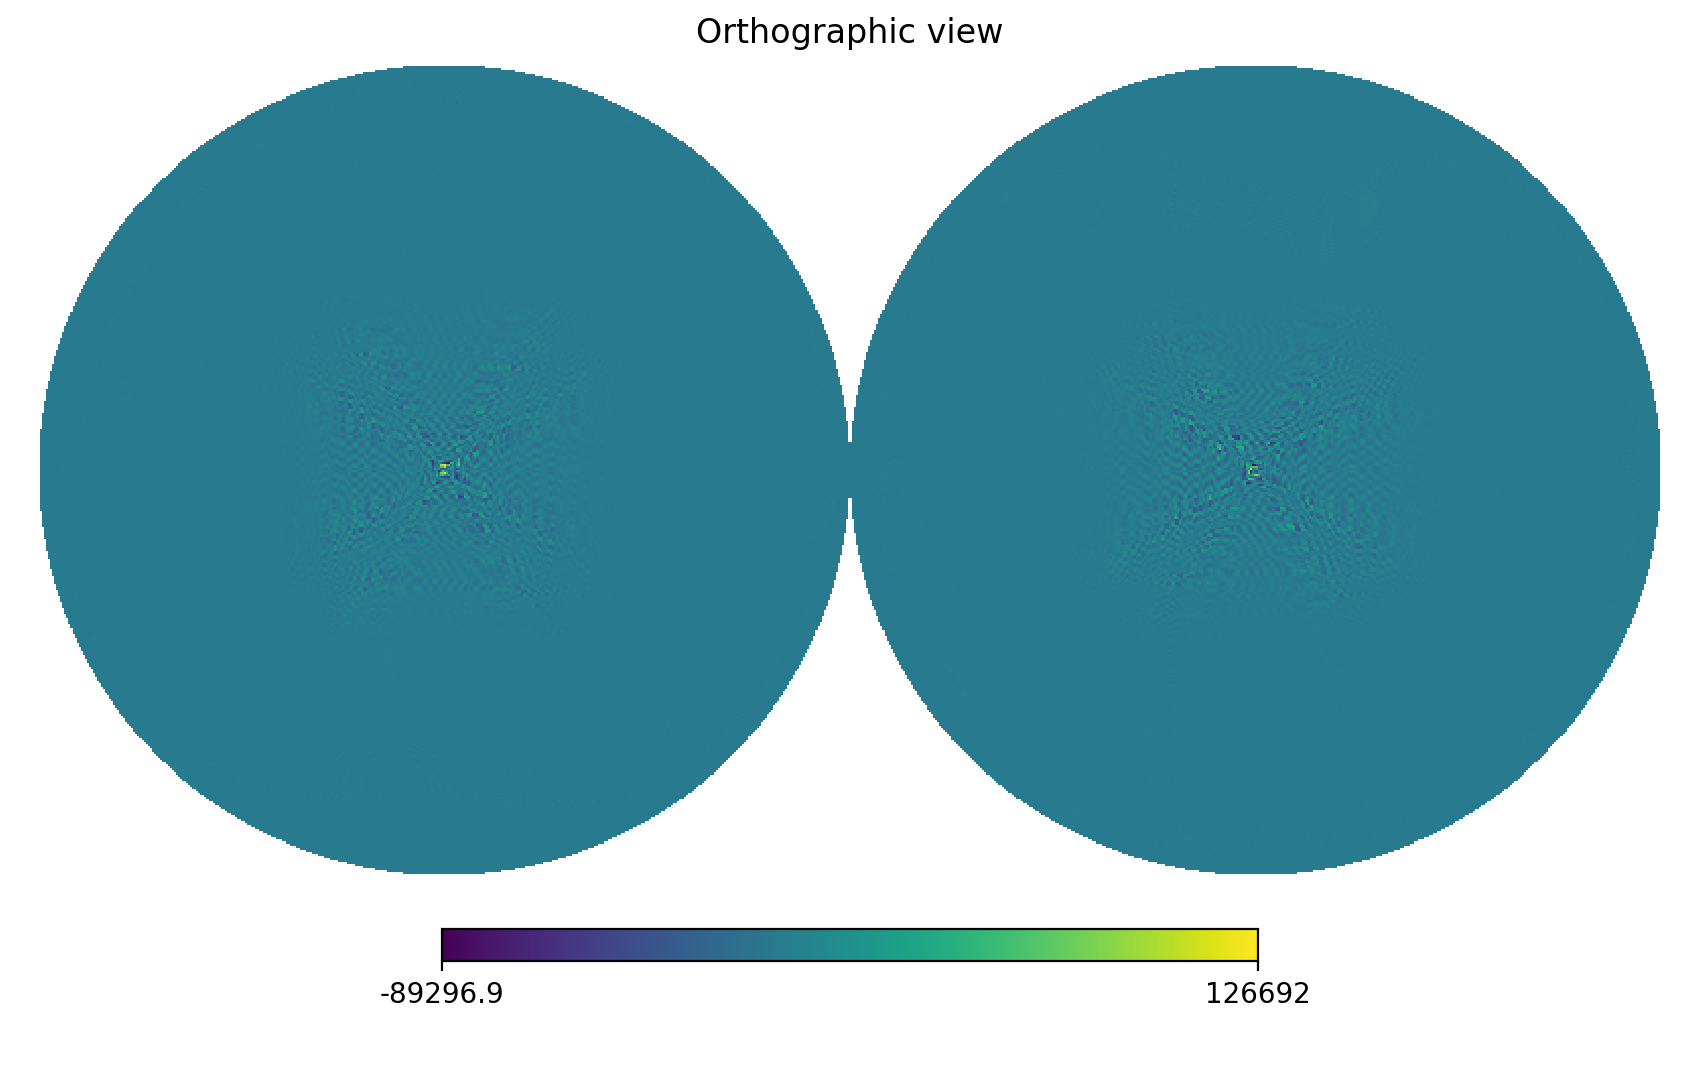

In [40]:
h.orthview(TEBf[2,]-TEB[2,],rot=(0,90))